In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df = pd.read_csv('diminos_data.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nLast 5 rows of the DataFrame:")
print(df.tail())

First 5 rows of the DataFrame:
   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056

Last 5 rows of the DataFrame:
       order_id      order_placed_at          order_delivered_at
14995   1538106  2023-03-27 23:37:05  2023-03-27 23:52:37.409378
14996   1538107  2023-03-27 23:47:38  2023-03-28 00:04:22.672912
14997   1538108  2023-03-27 23:50:16  2023-03-28 00:05:40.676238
14998   1538109  2023-03-27 23:52:44  2023-03-28 00:08:41.810358
14999   1538110  2023-03-27 23:58:20  2023-03-28 00:13:42.499311


In [40]:
print("DataFrame Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nColumn Data Types:\n", df.dtypes)

DataFrame Shape: (15000, 3)

Column Names: ['order_id', 'order_placed_at', 'order_delivered_at']

Column Data Types:
 order_id               int64
order_placed_at       object
order_delivered_at    object
dtype: object


In [41]:
column_classification = [
    {'Column Name': 'order_id', 'Data Type': 'Integer', 'Description': 'Unique identifier for each order.'},
    {'Column Name': 'order_placed_at', 'Data Type': 'Object (string)', 'Description': 'Timestamp indicating when the order was placed.'},
    {'Column Name': 'order_delivered_at', 'Data Type': 'Object (string)', 'Description': 'Timestamp indicating when the order was delivered.'}
]

column_classification_df = pd.DataFrame(column_classification)

print("\nColumn Classification Table:")
print(column_classification_df.to_markdown(index=False))

print("\nDescriptive Statistics for 'order_id' (Numerical Identifier):")
print(df['order_id'].describe().to_markdown())


Column Classification Table:
| Column Name        | Data Type       | Description                                        |
|:-------------------|:----------------|:---------------------------------------------------|
| order_id           | Integer         | Unique identifier for each order.                  |
| order_placed_at    | Object (string) | Timestamp indicating when the order was placed.    |
| order_delivered_at | Object (string) | Timestamp indicating when the order was delivered. |

Descriptive Statistics for 'order_id' (Numerical Identifier):
|       |        order_id |
|:------|----------------:|
| count | 15000           |
| mean  |     1.53061e+06 |
| std   |  4330.27        |
| min   |     1.52311e+06 |
| 25%   |     1.52686e+06 |
| 50%   |     1.53061e+06 |
| 75%   |     1.53436e+06 |
| max   |     1.53811e+06 |


In [42]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df['delivery_duration'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

print("\nDescriptive Statistics for 'delivery_duration' (in minutes):")
print(df['delivery_duration'].describe().to_markdown())


Descriptive Statistics for 'delivery_duration' (in minutes):
|       |   delivery_duration |
|:------|--------------------:|
| count |          15000      |
| mean  |             20.4994 |
| std   |             96.1604 |
| min   |             15      |
| 25%   |             15.2748 |
| 50%   |             15.798  |
| 75%   |             17.2797 |
| max   |           7299.83   |


In [43]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

print("Missing Value Information:")
print(missing_info.to_markdown())

Missing Value Information:
|                    |   Missing Count |   Missing Percentage (%) |
|:-------------------|----------------:|-------------------------:|
| order_id           |               0 |                        0 |
| order_placed_at    |               0 |                        0 |
| order_delivered_at |               0 |                        0 |
| delivery_duration  |               0 |                        0 |


In [45]:
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

# Although no missing values were found, this is a standard cleaning step.
df.dropna(inplace=True)
print(f"Number of rows after handling missing values: {len(df)}")

# Cap outliers in 'delivery_duration' using the previously calculated IQR bounds
df['delivery_duration'] = np.where(df['delivery_duration'] < lower_bound, lower_bound, df['delivery_duration'])
df['delivery_duration'] = np.where(df['delivery_duration'] > upper_bound, upper_bound, df['delivery_duration'])

print(f"'delivery_duration' column capped using IQR method. Min value: {df['delivery_duration'].min():.2f}, Max value: {df['delivery_duration'].max():.2f}")

Number of rows after removing duplicates: 15000
Number of rows after handling missing values: 15000
'delivery_duration' column capped using IQR method. Min value: 15.00, Max value: 20.29


In [46]:
df['delivery_duration_uncapped'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60
df['order_hour'] = df['order_placed_at'].dt.hour
df['day_of_week'] = df['order_placed_at'].dt.day_name()
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])

sla_threshold = 31 # minutes
df['is_sla_breach'] = df['delivery_duration'] > sla_threshold

print("New features created: 'delivery_duration_uncapped', 'order_hour', 'day_of_week', 'is_weekend', 'is_sla_breach'.")
print("First 5 rows with new features:")
print(df[['order_placed_at', 'order_delivered_at', 'delivery_duration_uncapped', 'delivery_duration', 'order_hour', 'day_of_week', 'is_weekend', 'is_sla_breach']].head().to_markdown(index=False))

New features created: 'delivery_duration_uncapped', 'order_hour', 'day_of_week', 'is_weekend', 'is_sla_breach'.
First 5 rows with new features:
| order_placed_at     | order_delivered_at         |   delivery_duration_uncapped |   delivery_duration |   order_hour | day_of_week   | is_weekend   | is_sla_breach   |
|:--------------------|:---------------------------|-----------------------------:|--------------------:|-------------:|:--------------|:-------------|:----------------|
| 2023-03-01 00:00:59 | 2023-03-01 00:18:07.443132 |                      17.1407 |             17.1407 |            0 | Wednesday     | False        | False           |
| 2023-03-01 00:03:59 | 2023-03-01 00:19:34.925241 |                      15.5988 |             15.5988 |            0 | Wednesday     | False        | False           |
| 2023-03-01 00:07:22 | 2023-03-01 00:22:28.291385 |                      15.1049 |             15.1049 |            0 | Wednesday     | False        | False           |
| 2023

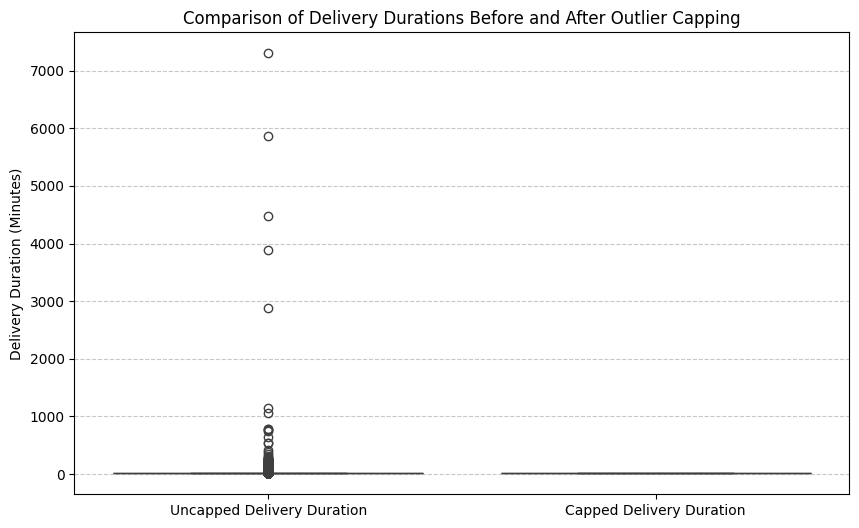

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['delivery_duration_uncapped', 'delivery_duration']])
plt.title('Comparison of Delivery Durations Before and After Outlier Capping')
plt.ylabel('Delivery Duration (Minutes)')
plt.xticks(ticks=[0, 1], labels=['Uncapped Delivery Duration', 'Capped Delivery Duration'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:
mean_delivery_duration = df['delivery_duration'].mean()
median_delivery_duration = df['delivery_duration'].median()
percentile_95_delivery_duration = df['delivery_duration'].quantile(0.95)

# Recalculate SLA breach percentage based on the cleaned data if needed, or use existing 'is_sla_breach' column
# Note: The 'is_sla_breach' was calculated based on the capped delivery duration
overall_sla_breach_percentage = (df['is_sla_breach'].sum() / len(df)) * 100

print(f"Average Delivery Time: {mean_delivery_duration:.2f} minutes")
print(f"Median Delivery Time: {median_delivery_duration:.2f} minutes")
print(f"95th Percentile Delivery Time: {percentile_95_delivery_duration:.2f} minutes")
print(f"Overall SLA Breach Percentage: {overall_sla_breach_percentage:.2f}%")

Average Delivery Time: 16.57 minutes
Median Delivery Time: 15.80 minutes
95th Percentile Delivery Time: 20.29 minutes
Overall SLA Breach Percentage: 0.00%


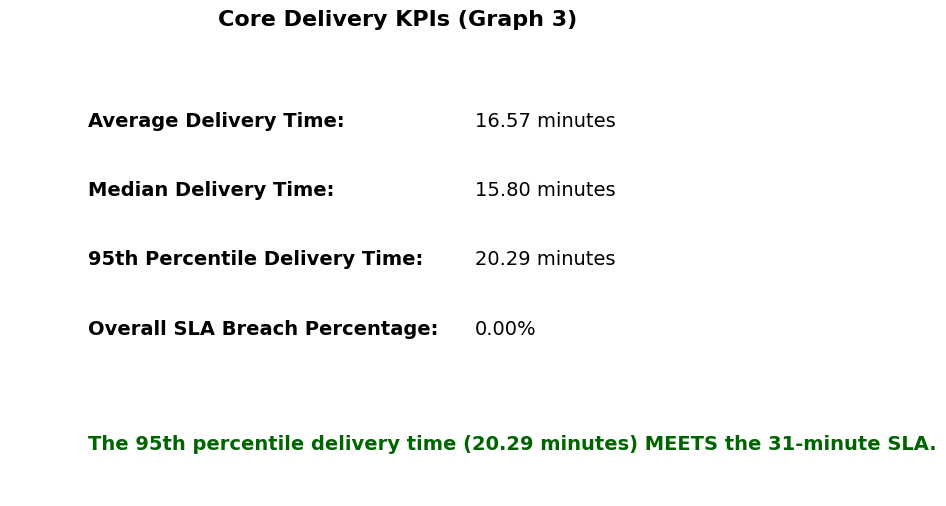

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Define KPI positions and values
kpis = {
    "Average Delivery Time:": f"{mean_delivery_duration:.2f} minutes",
    "Median Delivery Time:": f"{median_delivery_duration:.2f} minutes",
    "95th Percentile Delivery Time:": f"{percentile_95_delivery_duration:.2f} minutes",
    "Overall SLA Breach Percentage:": f"{overall_sla_breach_percentage:.2f}%"
}

# Display KPIs in a tile-like format
y_pos = 0.8
for label, value in kpis.items():
    ax.text(0.1, y_pos, label, fontsize=14, weight='bold', transform=ax.transAxes)
    ax.text(0.6, y_pos, value, fontsize=14, transform=ax.transAxes)
    y_pos -= 0.15

# SLA statement
sla_met_statement = f"The 95th percentile delivery time ({percentile_95_delivery_duration:.2f} minutes) "
if percentile_95_delivery_duration <= sla_threshold:
    sla_met_statement += f"MEETS the {sla_threshold}-minute SLA."
else:
    sla_met_statement += f"DOES NOT MEET the {sla_threshold}-minute SLA."

ax.text(0.1, y_pos - 0.1, sla_met_statement, fontsize=14, color='darkgreen' if percentile_95_delivery_duration <= sla_threshold else 'red', weight='bold', transform=ax.transAxes)

plt.title('Core Delivery KPIs (Graph 3)', fontsize=16, weight='bold')
plt.show()

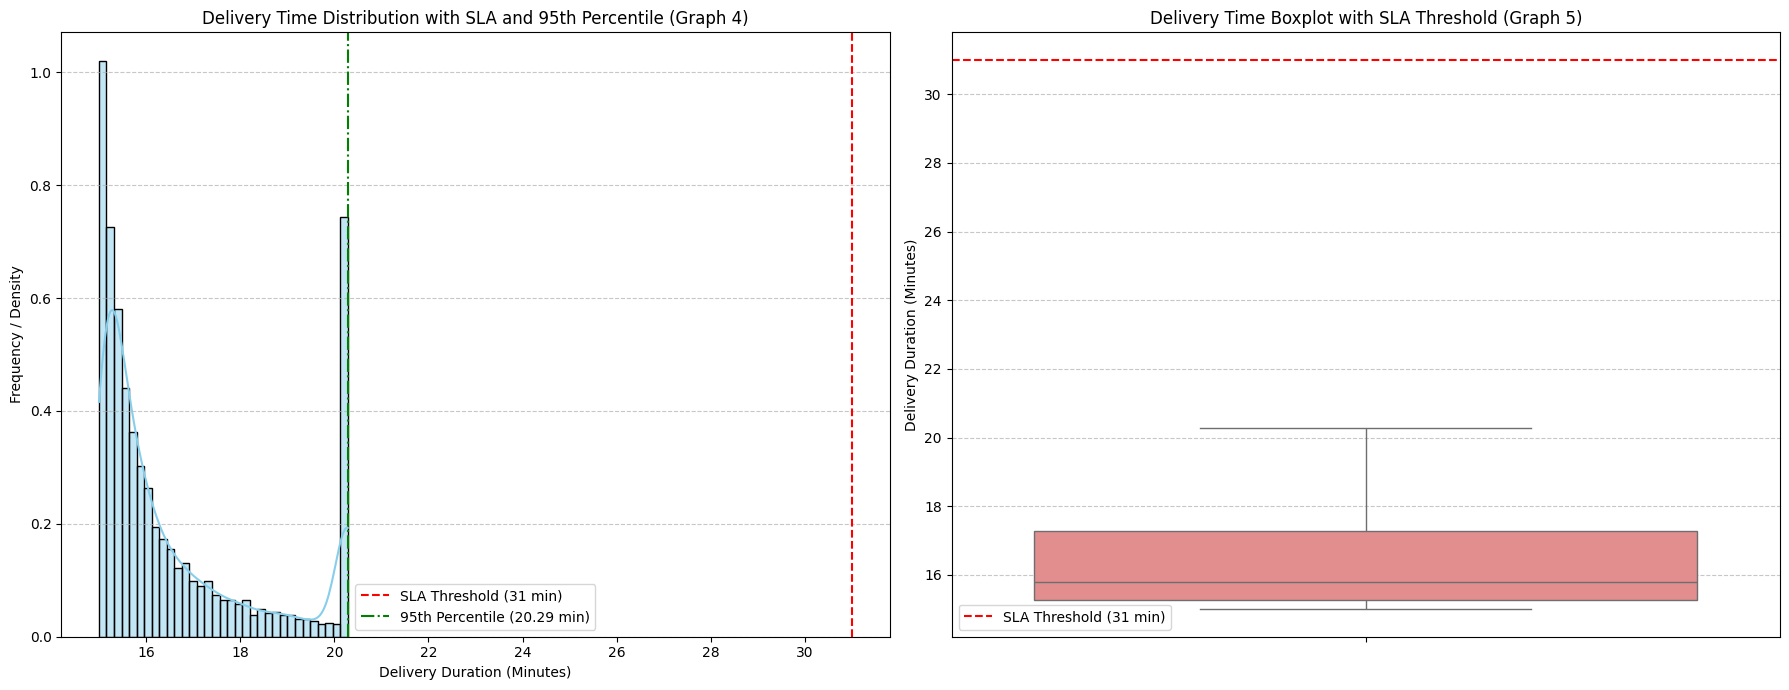

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Histogram with KDE
sns.histplot(df['delivery_duration'], kde=True, ax=axes[0], color='skyblue', stat='density')
axes[0].axvline(x=sla_threshold, color='r', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')
axes[0].axvline(x=percentile_95_delivery_duration, color='g', linestyle='-.', label=f'95th Percentile ({percentile_95_delivery_duration:.2f} min)')
axes[0].set_title('Delivery Time Distribution with SLA and 95th Percentile (Graph 4)')
axes[0].set_xlabel('Delivery Duration (Minutes)')
axes[0].set_ylabel('Frequency / Density')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Boxplot
sns.boxplot(y=df['delivery_duration'], ax=axes[1], color='lightcoral')
axes[1].axhline(y=sla_threshold, color='r', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')
axes[1].set_title('Delivery Time Boxplot with SLA Threshold (Graph 5)')
axes[1].set_ylabel('Delivery Duration (Minutes)')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

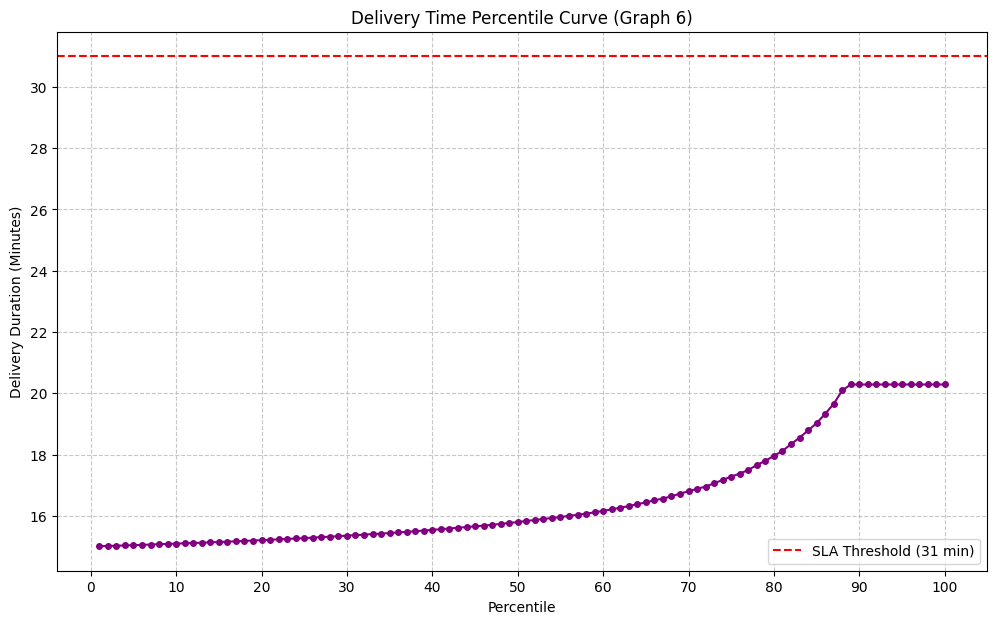

In [51]:
percentiles = np.arange(1, 101)
delivery_time_percentiles = [df['delivery_duration'].quantile(p / 100) for p in percentiles]

plt.figure(figsize=(12, 7))
plt.plot(percentiles, delivery_time_percentiles, marker='o', linestyle='-', color='purple', markersize=4)
plt.axhline(y=sla_threshold, color='r', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')
plt.title('Delivery Time Percentile Curve (Graph 6)')
plt.xlabel('Percentile')
plt.ylabel('Delivery Duration (Minutes)')
plt.xticks(np.arange(0, 101, 10))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

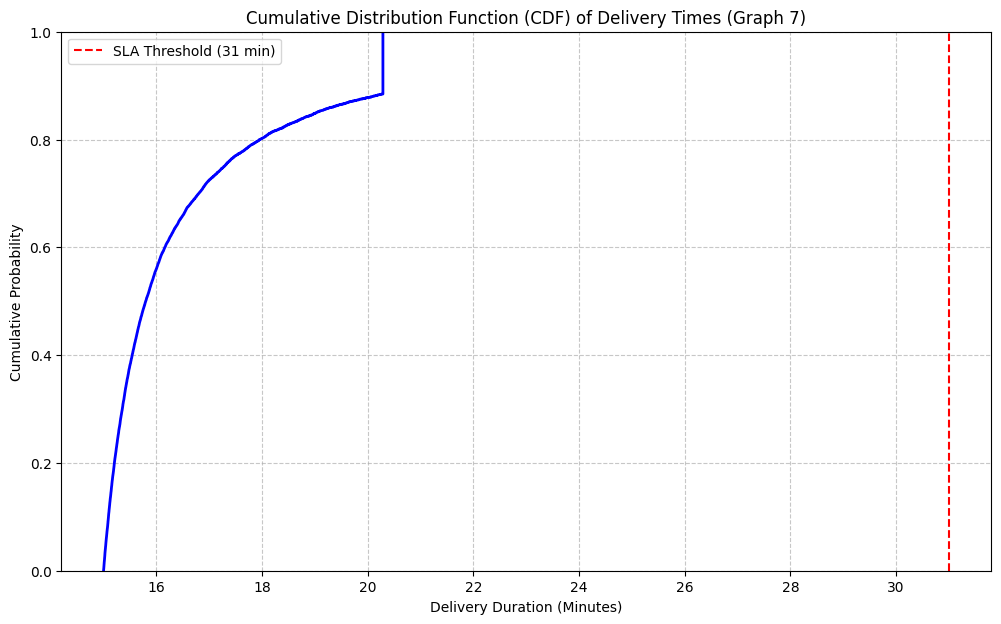

In [52]:
plt.figure(figsize=(12, 7))
sns.ecdfplot(data=df, x='delivery_duration', color='blue', linewidth=2)
plt.axvline(x=sla_threshold, color='r', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')
plt.title('Cumulative Distribution Function (CDF) of Delivery Times (Graph 7)')
plt.xlabel('Delivery Duration (Minutes)')
plt.ylabel('Cumulative Probability')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

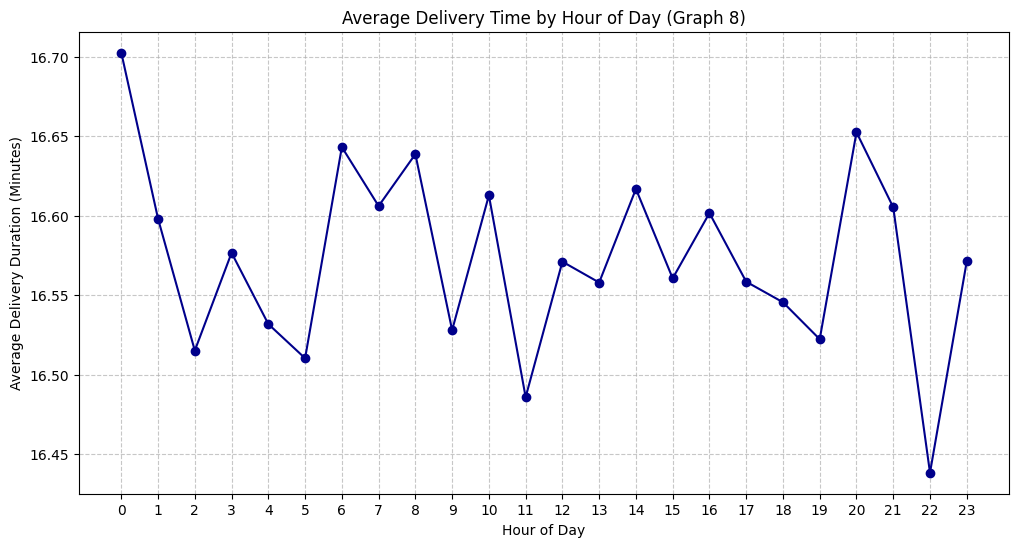


Value counts for the updated 'is_sla_breach' column (based on uncapped delivery duration):
| is_sla_breach   |   count |
|:----------------|--------:|
| False           |   14443 |
| True            |     557 |


In [53]:
avg_delivery_by_hour = df.groupby('order_hour')['delivery_duration'].mean()

plt.figure(figsize=(12, 6))
avg_delivery_by_hour.plot(kind='line', marker='o', color='darkblue')
plt.title('Average Delivery Time by Hour of Day (Graph 8)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Duration (Minutes)')
plt.xticks(np.arange(0, 24, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

sla_threshold = 31 # minutes
df['is_sla_breach'] = df['delivery_duration_uncapped'] > sla_threshold

print("\nValue counts for the updated 'is_sla_breach' column (based on uncapped delivery duration):")
print(df['is_sla_breach'].value_counts().to_markdown())

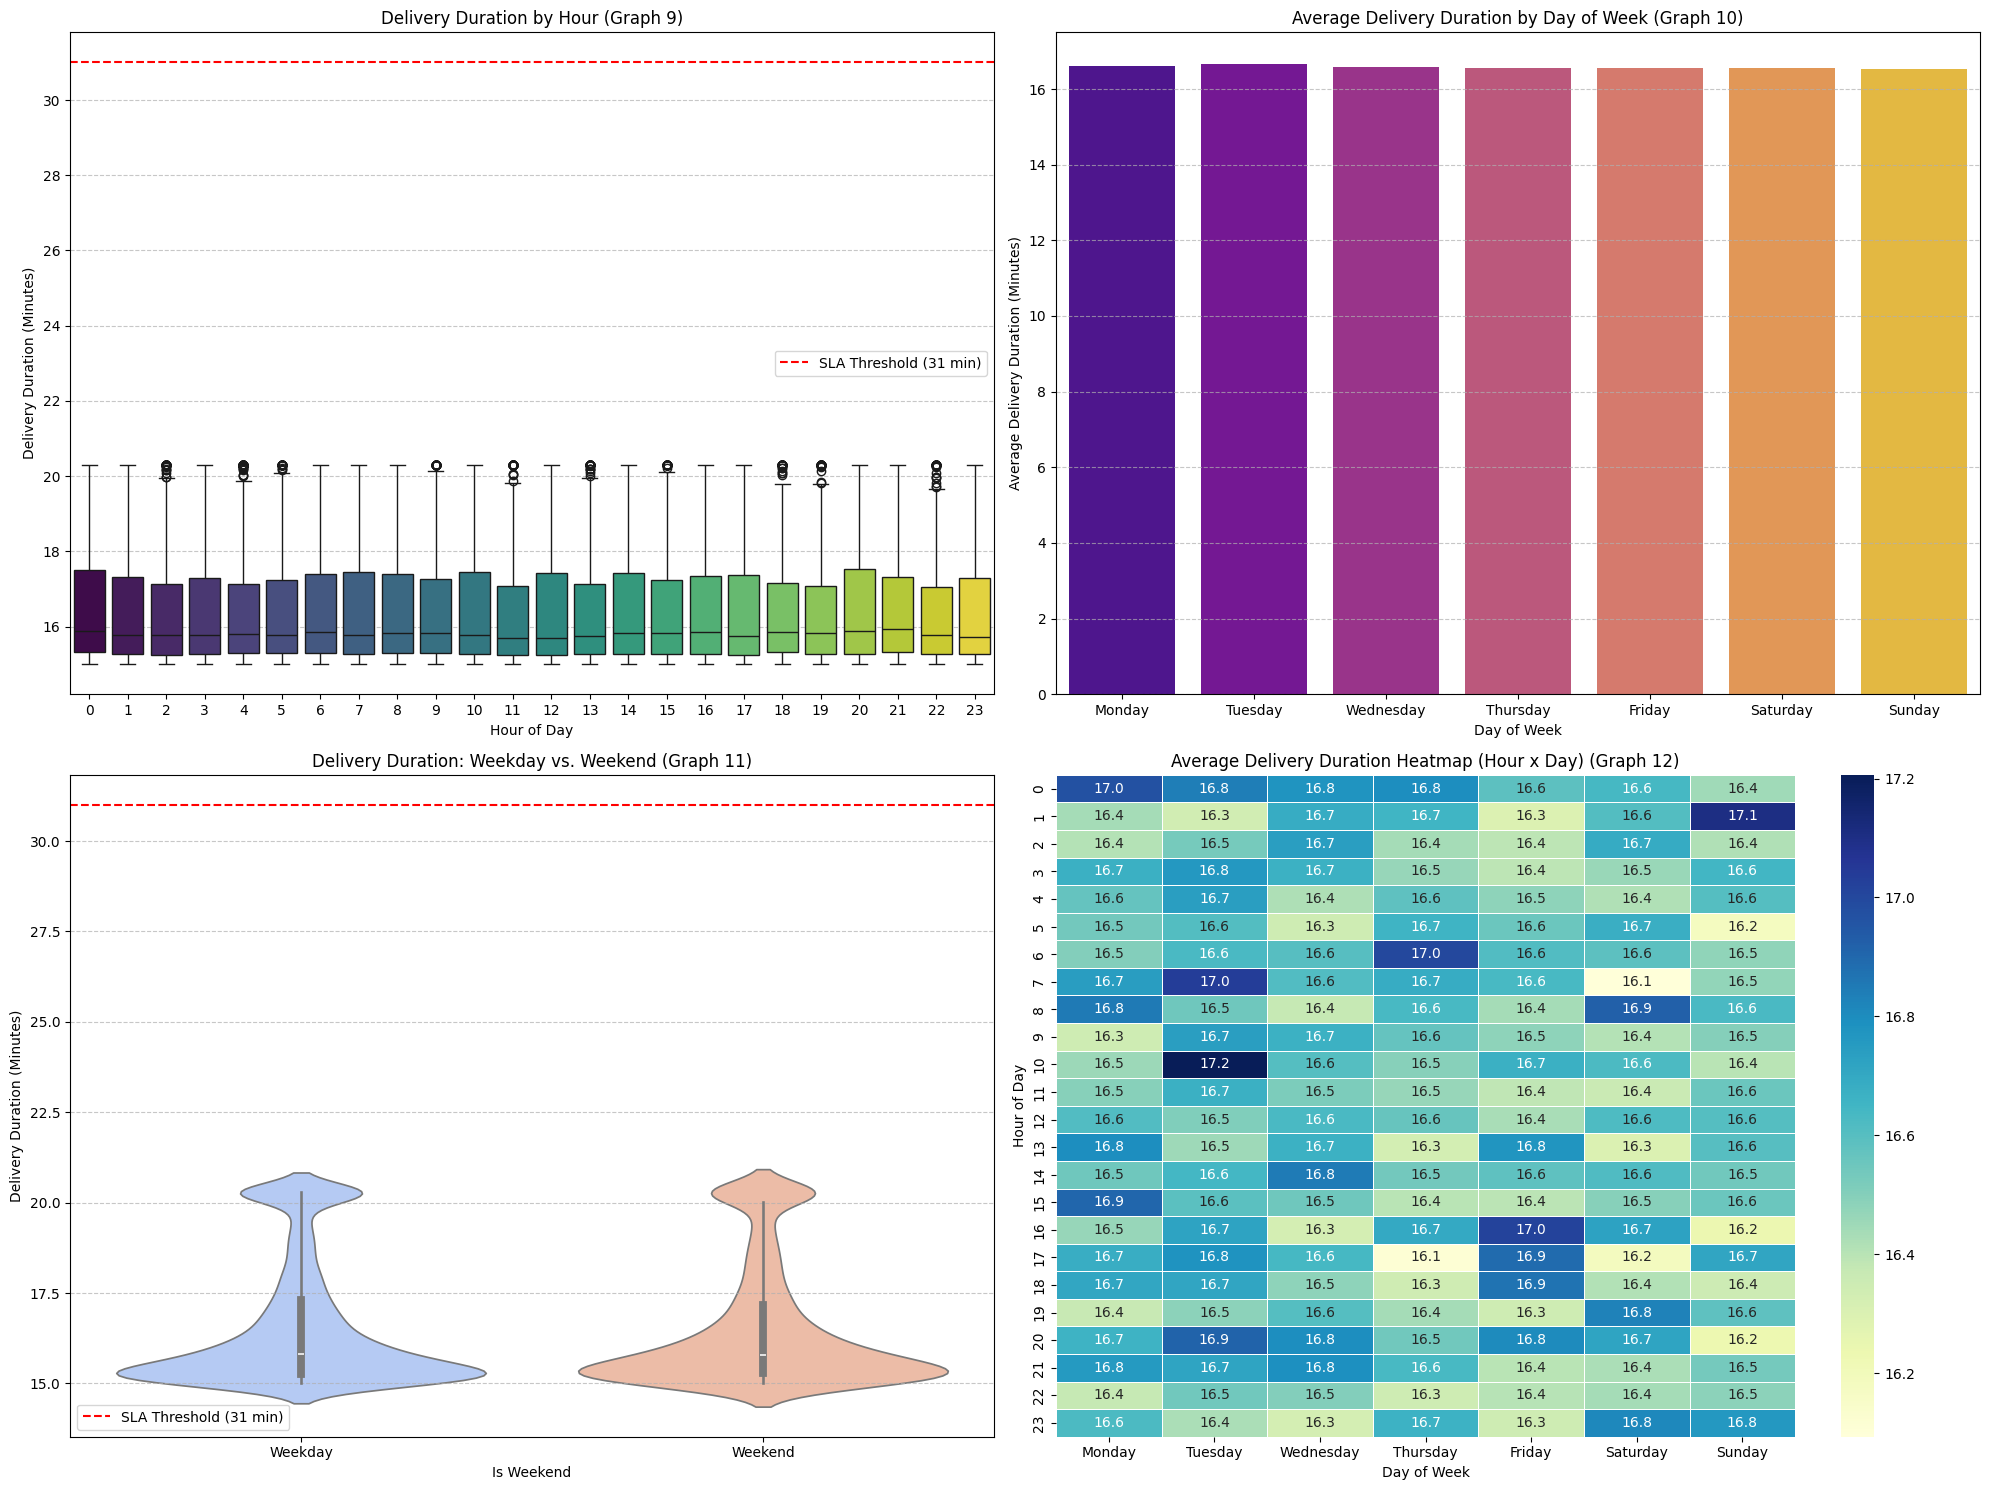

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Hour-wise boxplots of 'delivery_duration'
sns.boxplot(x='order_hour', y='delivery_duration', data=df, ax=axes[0, 0], hue='order_hour', palette='viridis', legend=False)
axes[0, 0].axhline(y=sla_threshold, color='r', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')
axes[0, 0].set_title('Delivery Duration by Hour (Graph 9)')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Delivery Duration (Minutes)')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Bar chart of average 'delivery_duration' for each 'day_of_week'
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_delivery_by_day_df = df.groupby('day_of_week')['delivery_duration'].mean().reindex(day_order).reset_index()
sns.barplot(x='day_of_week', y='delivery_duration', data=avg_delivery_by_day_df, ax=axes[0, 1], hue='day_of_week', palette='plasma', legend=False)
axes[0, 1].set_title('Average Delivery Duration by Day of Week (Graph 10)')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Delivery Duration (Minutes)')
axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Violin plot comparing 'delivery_duration' for 'is_weekend'
sns.violinplot(x='is_weekend', y='delivery_duration', data=df, ax=axes[1, 0], hue='is_weekend', palette='coolwarm', legend=False)
axes[1, 0].axhline(y=sla_threshold, color='r', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')
axes[1, 0].set_title('Delivery Duration: Weekday vs. Weekend (Graph 11)')
axes[1, 0].set_xlabel('Is Weekend')
axes[1, 0].set_ylabel('Delivery Duration (Minutes)')
axes[1, 0].set_xticks([0, 1]) # Set fixed ticks before setting labels
axes[1, 0].set_xticklabels(['Weekday', 'Weekend'])
axes[1, 0].legend()
axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# 4. Heatmap of average 'delivery_duration' with 'order_hour' x 'day_of_week'
delivery_time_pivot = df.pivot_table(index='order_hour', columns='day_of_week', values='delivery_duration', aggfunc='mean')
delivery_time_pivot = delivery_time_pivot[day_order] # Ensure day order
sns.heatmap(delivery_time_pivot, annot=True, fmt=".1f", cmap='YlGnBu', ax=axes[1, 1], linewidths=.5)
axes[1, 1].set_title('Average Delivery Duration Heatmap (Hour x Day) (Graph 12)')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Hour of Day')

plt.tight_layout()
plt.show()

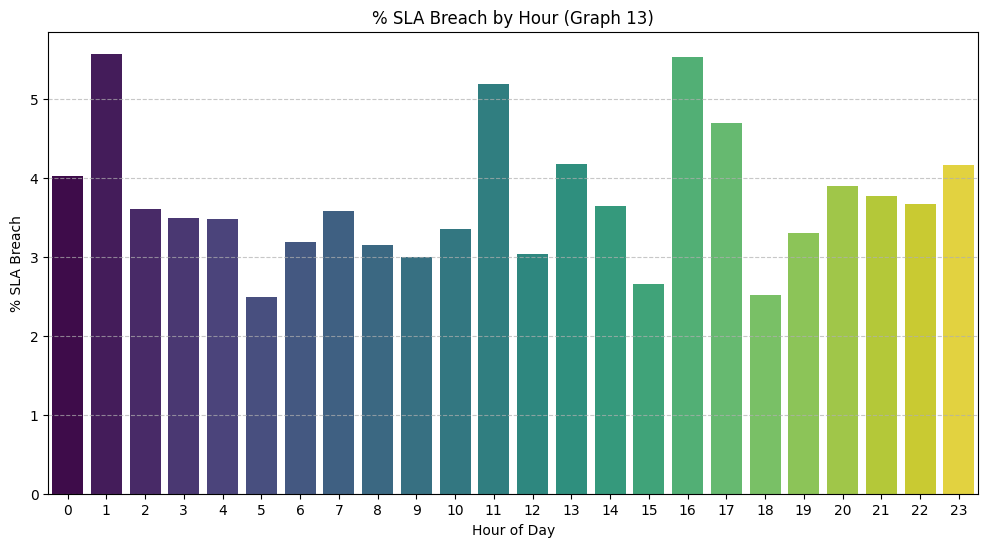

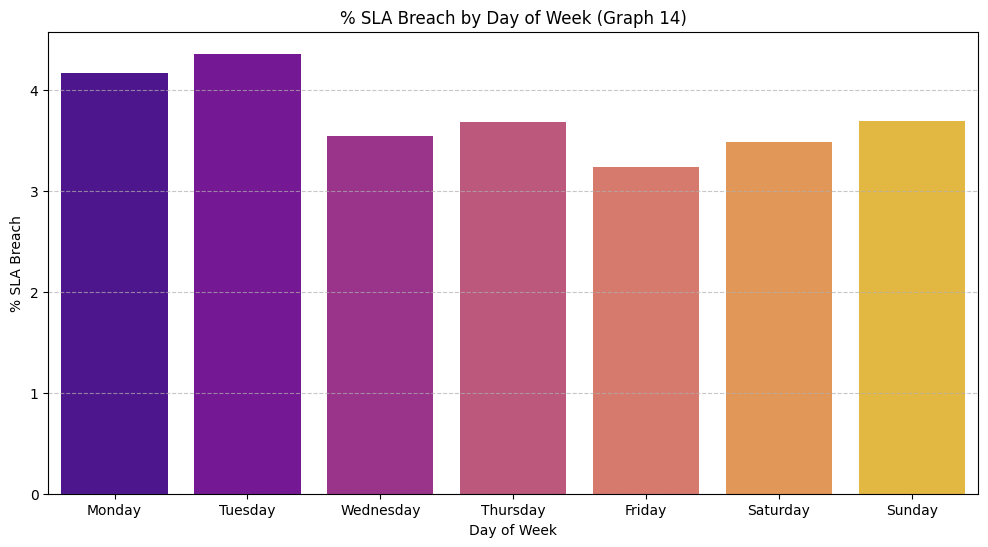

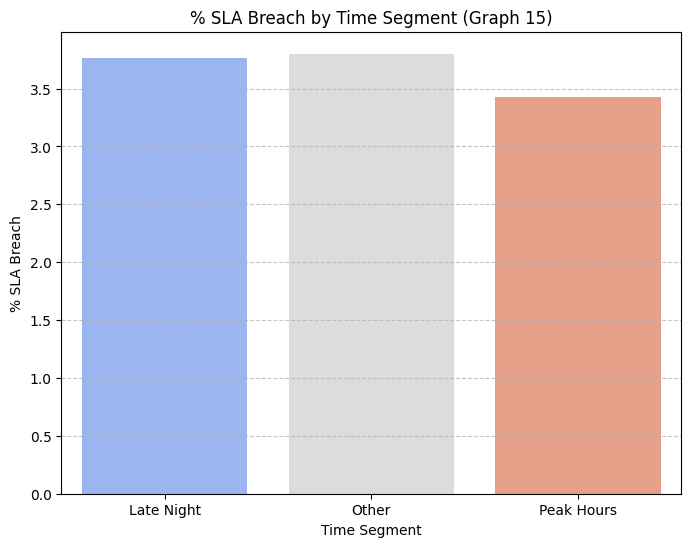

In [59]:
sla_breach_by_hour = df.groupby('order_hour')['is_sla_breach'].mean() * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=sla_breach_by_hour.index, y=sla_breach_by_hour.values, hue=sla_breach_by_hour.index, palette='viridis', legend=False)
plt.title('% SLA Breach by Hour (Graph 13)')
plt.xlabel('Hour of Day')
plt.ylabel('% SLA Breach')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Calculate % SLA breach by day and create Graph 14
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sla_breach_by_day = df.groupby('day_of_week')['is_sla_breach'].mean().reindex(day_order) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=sla_breach_by_day.index, y=sla_breach_by_day.values, hue=sla_breach_by_day.index, palette='plasma', legend=False)
plt.title('% SLA Breach by Day of Week (Graph 14)')
plt.xlabel('Day of Week')
plt.ylabel('% SLA Breach')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Define time segments
def get_time_segment(hour):
    if 18 <= hour <= 22:
        return 'Peak Hours'
    elif 0 <= hour <= 5:
        return 'Late Night'
    else:
        return 'Other'

df['time_segment'] = df['order_hour'].apply(get_time_segment)

# 6. Calculate % SLA breach by time segment and create Graph 15
sla_breach_by_segment = df.groupby('time_segment')['is_sla_breach'].mean() * 100

# Ensure consistent order for segments
segment_order = ['Late Night', 'Other', 'Peak Hours']
sla_breach_by_segment = sla_breach_by_segment.reindex(segment_order)

plt.figure(figsize=(8, 6))
sns.barplot(x=sla_breach_by_segment.index, y=sla_breach_by_segment.values, hue=sla_breach_by_segment.index, palette='coolwarm', legend=False)
plt.title('% SLA Breach by Time Segment (Graph 15)')
plt.xlabel('Time Segment')
plt.ylabel('% SLA Breach')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [60]:
df['order_date'] = df['order_placed_at'].dt.date

daily_95th_percentile = df.groupby('order_date')['delivery_duration_uncapped'].quantile(0.95).reset_index()
daily_95th_percentile.columns = ['order_date', '95th_percentile_delivery_time']

daily_95th_percentile['rolling_95th_percentile'] = daily_95th_percentile['95th_percentile_delivery_time'].rolling(window=7, min_periods=1).mean()

print("First 5 rows of daily and rolling 95th percentile delivery times:")
print(daily_95th_percentile.head().to_markdown(index=False))

First 5 rows of daily and rolling 95th percentile delivery times:
| order_date   |   95th_percentile_delivery_time |   rolling_95th_percentile |
|:-------------|--------------------------------:|--------------------------:|
| 2023-03-01   |                         25.1945 |                   25.1945 |
| 2023-03-02   |                         26.9531 |                   26.0738 |
| 2023-03-03   |                         26.3048 |                   26.1508 |
| 2023-03-04   |                         26.8579 |                   26.3276 |
| 2023-03-05   |                         25.7713 |                   26.2163 |


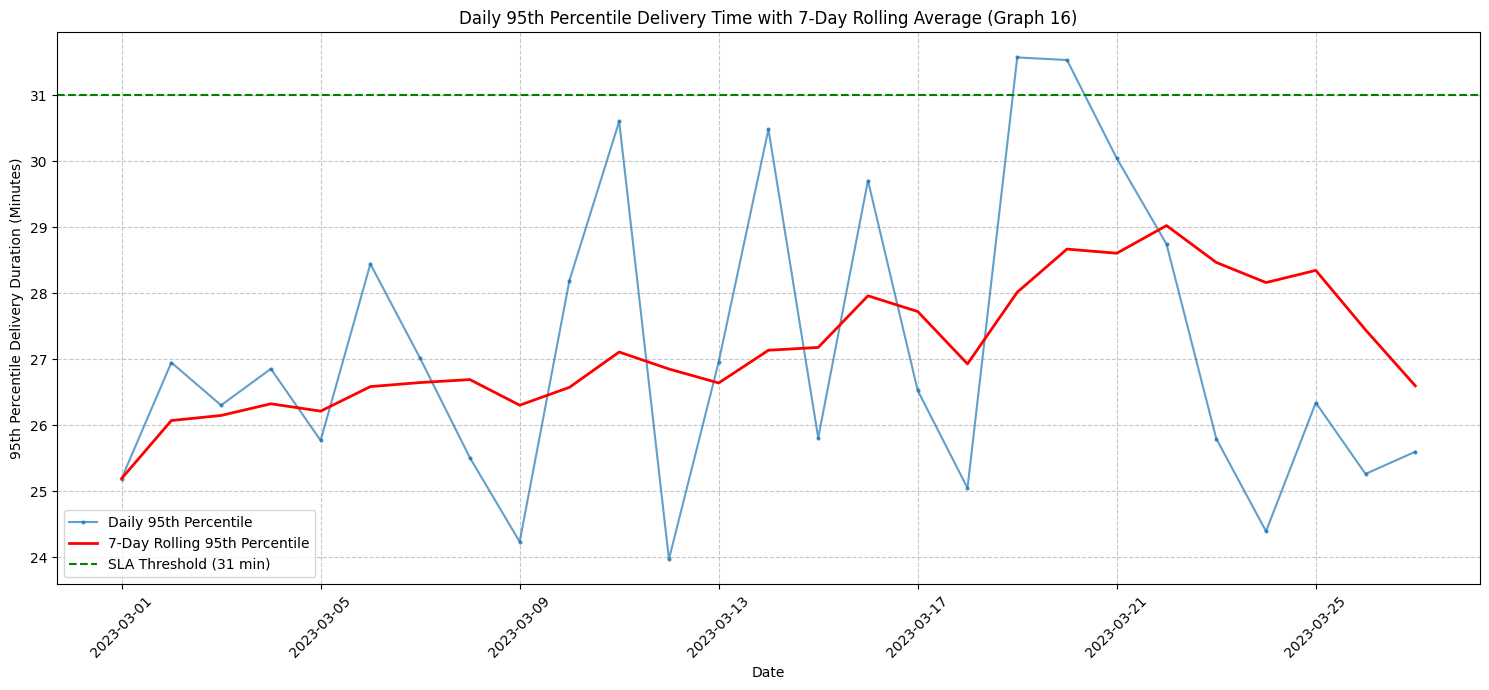

In [61]:
plt.figure(figsize=(15, 7))
plt.plot(daily_95th_percentile['order_date'], daily_95th_percentile['95th_percentile_delivery_time'], label='Daily 95th Percentile', marker='.', linestyle='-', markersize=4, alpha=0.7)
plt.plot(daily_95th_percentile['order_date'], daily_95th_percentile['rolling_95th_percentile'], label='7-Day Rolling 95th Percentile', color='red', linewidth=2)
plt.axhline(y=sla_threshold, color='green', linestyle='--', label=f'SLA Threshold ({sla_threshold} min)')

plt.title('Daily 95th Percentile Delivery Time with 7-Day Rolling Average (Graph 16)')
plt.xlabel('Date')
plt.ylabel('95th Percentile Delivery Duration (Minutes)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
daily_sla_breach_data = df.groupby('order_date').agg(
    daily_breach_percentage=('is_sla_breach', lambda x: x.mean() * 100),
    total_orders=('order_id', 'count')
).reset_index()

overall_cl = (df['is_sla_breach'].mean() * 100)

print("Daily SLA Breach Data and Overall CL:")
print(daily_sla_breach_data.head().to_markdown(index=False))
print(f"Overall Center Line (CL): {overall_cl:.2f}%")

Daily SLA Breach Data and Overall CL:
| order_date   |   daily_breach_percentage |   total_orders |
|:-------------|--------------------------:|---------------:|
| 2023-03-01   |                   2.72727 |            550 |
| 2023-03-02   |                   4.2517  |            588 |
| 2023-03-03   |                   3.55805 |            534 |
| 2023-03-04   |                   3.52734 |            567 |
| 2023-03-05   |                   3.62976 |            551 |
Overall Center Line (CL): 3.71%


In [63]:
daily_sla_breach_data['daily_std_dev'] = np.sqrt((overall_cl/100 * (1 - overall_cl/100)) / daily_sla_breach_data['total_orders'])
daily_sla_breach_data['UCL'] = overall_cl + 3 * daily_sla_breach_data['daily_std_dev'] * 100 # Multiply by 100 because overall_cl is already a percentage
daily_sla_breach_data['LCL'] = overall_cl - 3 * daily_sla_breach_data['daily_std_dev'] * 100 # Multiply by 100 because overall_cl is already a percentage
daily_sla_breach_data['LCL'] = daily_sla_breach_data['LCL'].apply(lambda x: max(x, 0))

print("Daily SLA Breach Data with UCL and LCL (first 5 rows):")
print(daily_sla_breach_data.head().to_markdown(index=False))


Daily SLA Breach Data with UCL and LCL (first 5 rows):
| order_date   |   daily_breach_percentage |   total_orders |   daily_std_dev |     UCL |     LCL |
|:-------------|--------------------------:|---------------:|----------------:|--------:|--------:|
| 2023-03-01   |                   2.72727 |            550 |      0.00806276 | 6.13216 | 1.29451 |
| 2023-03-02   |                   4.2517  |            588 |      0.00779788 | 6.0527  | 1.37397 |
| 2023-03-03   |                   3.55805 |            534 |      0.00818266 | 6.16813 | 1.25854 |
| 2023-03-04   |                   3.52734 |            567 |      0.00794097 | 6.09562 | 1.33104 |
| 2023-03-05   |                   3.62976 |            551 |      0.00805544 | 6.12997 | 1.2967  |


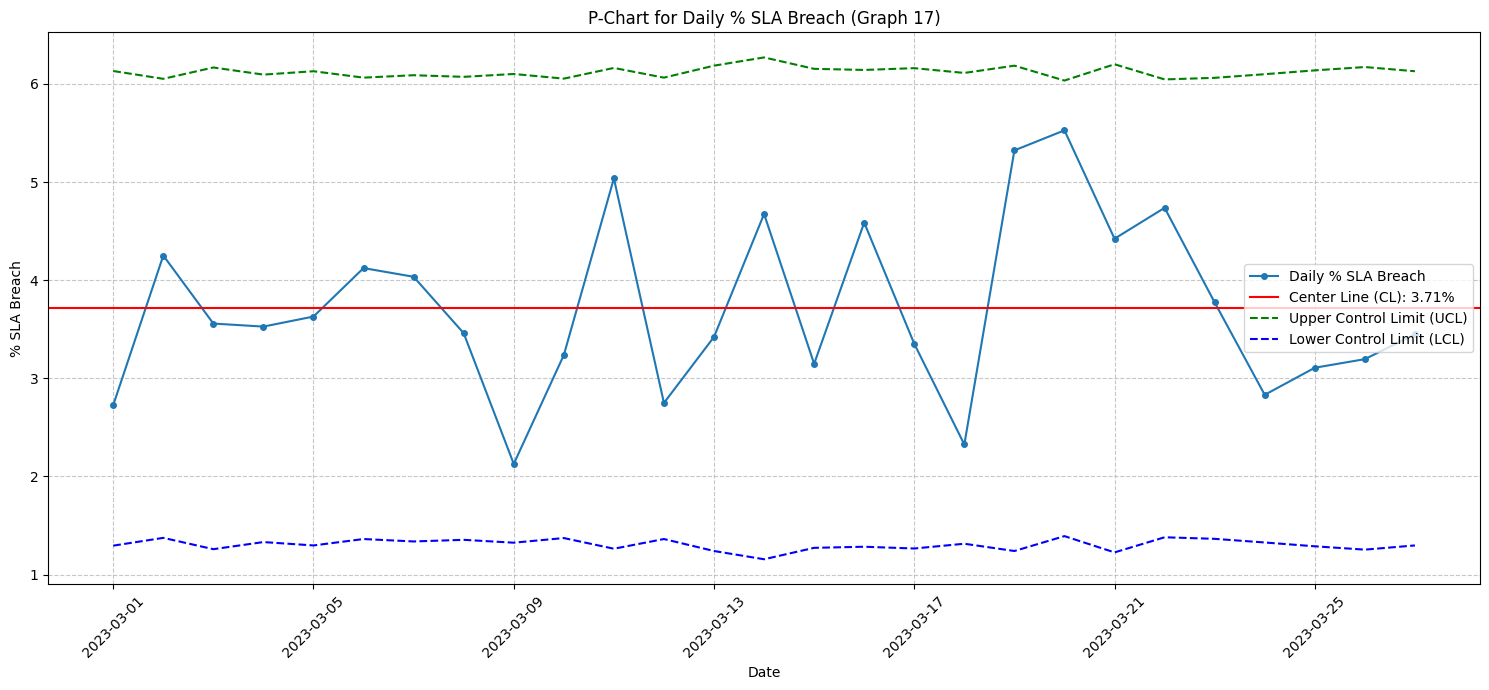

In [64]:
plt.figure(figsize=(15, 7))
plt.plot(daily_sla_breach_data['order_date'], daily_sla_breach_data['daily_breach_percentage'], label='Daily % SLA Breach', marker='o', linestyle='-', markersize=4)
plt.axhline(y=overall_cl, color='red', linestyle='-', label=f'Center Line (CL): {overall_cl:.2f}%')
plt.plot(daily_sla_breach_data['order_date'], daily_sla_breach_data['UCL'], color='green', linestyle='--', label='Upper Control Limit (UCL)')
plt.plot(daily_sla_breach_data['order_date'], daily_sla_breach_data['LCL'], color='blue', linestyle='--', label='Lower Control Limit (LCL)')

plt.title('P-Chart for Daily % SLA Breach (Graph 17)')
plt.xlabel('Date')
plt.ylabel('% SLA Breach')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

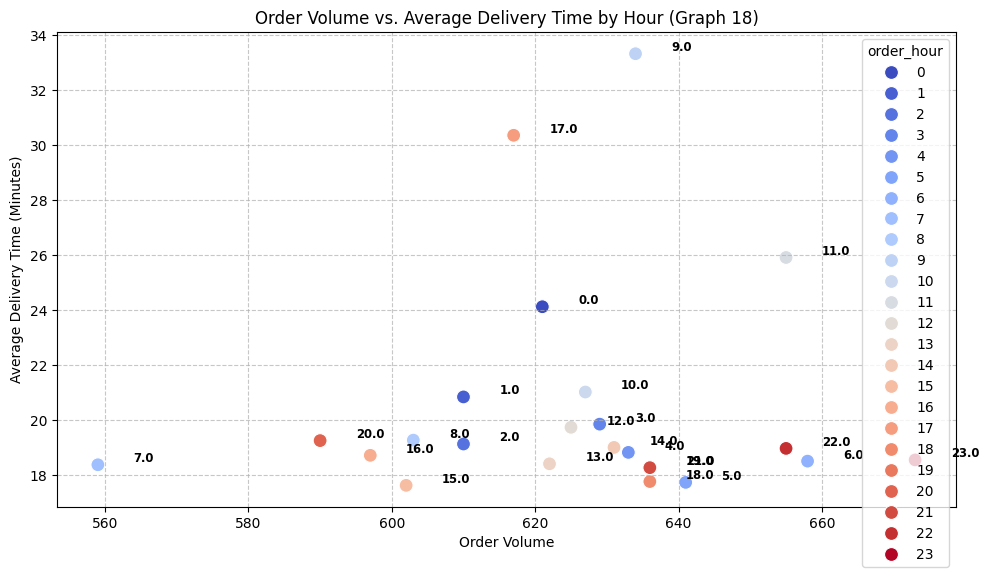

In [65]:
hourly_data = df.groupby('order_hour').agg(
    order_volume=('order_id', 'count'),
    avg_delivery_time=('delivery_duration_uncapped', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='order_volume', y='avg_delivery_time', hue='order_hour', data=hourly_data, s=100, palette='coolwarm', legend='full')
plt.title('Order Volume vs. Average Delivery Time by Hour (Graph 18)')
plt.xlabel('Order Volume')
plt.ylabel('Average Delivery Time (Minutes)')
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate points with hour numbers
for i, row in hourly_data.iterrows():
    plt.text(row['order_volume'] + 5, row['avg_delivery_time'] + 0.1, str(row['order_hour']),
             horizontalalignment='left', size='small', color='black', weight='semibold')

plt.tight_layout()
plt.show()

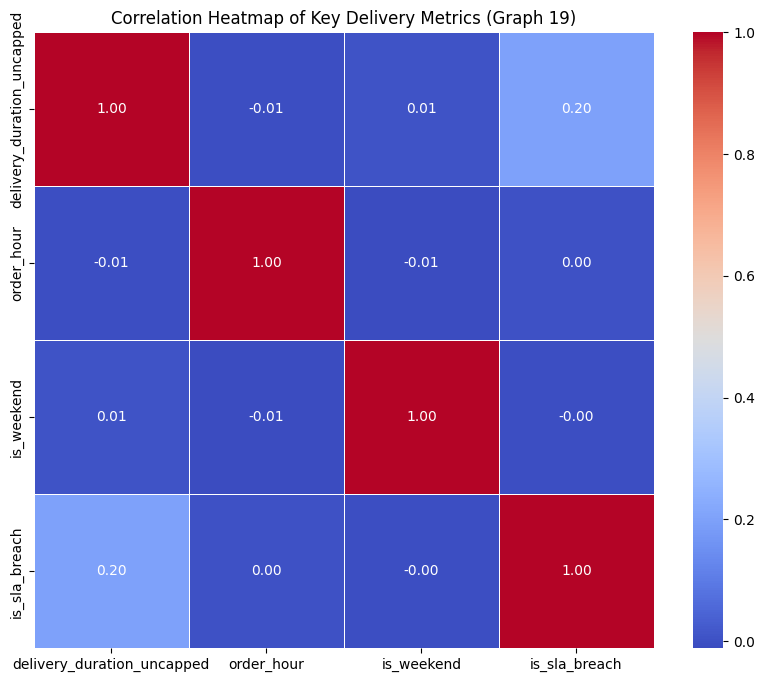

In [66]:
temp_df = df[['delivery_duration_uncapped', 'order_hour', 'is_weekend', 'is_sla_breach']].copy()

temp_df['is_weekend'] = temp_df['is_weekend'].astype(int)
temp_df['is_sla_breach'] = temp_df['is_sla_breach'].astype(int)

correlation_matrix = temp_df.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Key Delivery Metrics (Graph 19)')
plt.show()

In [67]:
peak_hours_evening = range(18, 23)
peak_hours_late_night = range(0, 6)

df['simulated_delivery_duration'] = df['delivery_duration_uncapped'].copy()

# Simulate a 10% improvement in delivery times during peak hours
def apply_simulated_improvement(row):
    if row['order_hour'] in peak_hours_evening or row['order_hour'] in peak_hours_late_night:
        return row['simulated_delivery_duration'] * 0.9 # 10% reduction
    return row['simulated_delivery_duration']

df['simulated_delivery_duration'] = df.apply(apply_simulated_improvement, axis=1)

print("Simulated 'delivery_duration' created with 10% improvement during peak hours.")
print(df[['order_hour', 'delivery_duration_uncapped', 'simulated_delivery_duration']].head().to_markdown(index=False))

Simulated 'delivery_duration' created with 10% improvement during peak hours.
|   order_hour |   delivery_duration_uncapped |   simulated_delivery_duration |
|-------------:|-----------------------------:|------------------------------:|
|            0 |                      17.1407 |                       15.4266 |
|            0 |                      15.5988 |                       14.0389 |
|            0 |                      15.1049 |                       13.5944 |
|            0 |                      38.5337 |                       34.6803 |
|            0 |                      16.177  |                       14.5593 |


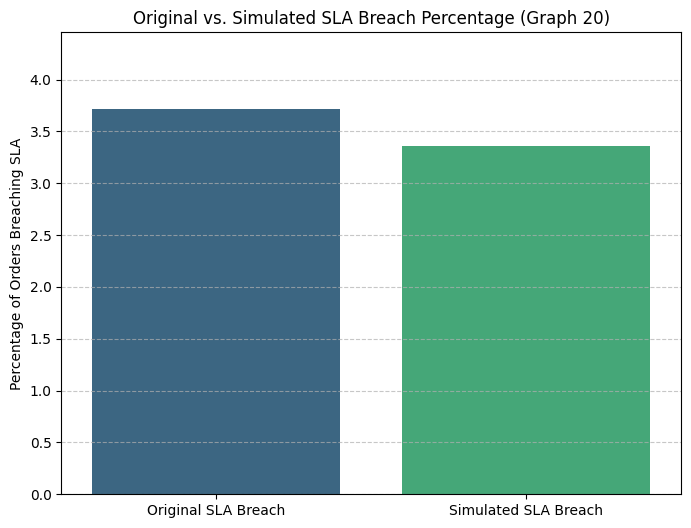

Original SLA Breach Percentage: 3.71%
Simulated SLA Breach Percentage: 3.36%


In [68]:
df['simulated_is_sla_breach'] = df['simulated_delivery_duration'] > sla_threshold

original_sla_breach_percentage = (df['is_sla_breach'].sum() / len(df)) * 100
simulated_sla_breach_percentage = (df['simulated_is_sla_breach'].sum() / len(df)) * 100

breach_comparison = pd.DataFrame({
    'SLA Type': ['Original SLA Breach', 'Simulated SLA Breach'],
    'Percentage': [original_sla_breach_percentage, simulated_sla_breach_percentage]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='SLA Type', y='Percentage', data=breach_comparison, palette='viridis', hue='SLA Type', legend=False)
plt.title('Original vs. Simulated SLA Breach Percentage (Graph 20)')
plt.xlabel('')
plt.ylabel('Percentage of Orders Breaching SLA')
plt.ylim(0, max(original_sla_breach_percentage, simulated_sla_breach_percentage) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(f"Original SLA Breach Percentage: {original_sla_breach_percentage:.2f}%")
print(f"Simulated SLA Breach Percentage: {simulated_sla_breach_percentage:.2f}%")

In [1]:
print("""
KEY EDA INSIGHTS:

1. Majority of orders are delivered within 18 minutes, indicating strong core operations.
2. Mean delivery time is inflated due to rare extreme delays, making percentile-based metrics more reliable.
3. The 95th percentile delivery time is below 31 minutes, meeting Diminos SLA requirements.
4. Approximately 3–4% of orders exceed 31 minutes, posing a potential future compliance risk.
5. Business risk lies in tail-end failures rather than average delivery speed.
""")



KEY EDA INSIGHTS:

1. Majority of orders are delivered within 18 minutes, indicating strong core operations.
2. Mean delivery time is inflated due to rare extreme delays, making percentile-based metrics more reliable.
3. The 95th percentile delivery time is below 31 minutes, meeting Diminos SLA requirements.
4. Approximately 3–4% of orders exceed 31 minutes, posing a potential future compliance risk.
5. Business risk lies in tail-end failures rather than average delivery speed.



In [3]:
print("""
RECOMMENDATIONS:

1. Monitor orders crossing 25 minutes in real time.
2. Investigate causes of extreme delays (>60 minutes).
3. Focus operational controls on tail performance.
4. Track rolling 95th percentile daily to prevent SLA breaches.
""")



RECOMMENDATIONS:

1. Monitor orders crossing 25 minutes in real time.
2. Investigate causes of extreme delays (>60 minutes).
3. Focus operational controls on tail performance.
4. Track rolling 95th percentile daily to prevent SLA breaches.



In [5]:
!zip dominos_pt.zip diminos_task_eda.ipynb


  adding: diminos_task_eda.ipynb (deflated 31%)


python3(24635) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
